In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#web scraping from basketball-reference.com
url = "https://www.basketball-reference.com/leagues/NBA_2020.html"
#read the html content, generate df
dflist = pd.read_html(url) #reading in the html content
table = dflist[10] #extract the desired table
advancedf = pd.DataFrame(table) #get it to be a df

In [ ]:
from google.colab import files
z = files.upload()

Saving DSO 579 HW 2 data.csv to DSO 579 HW 2 data.csv


In [ ]:
df = pd.read_csv('DSO 579 HW 2 data.csv')

In [ ]:
df.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G,Year
0,1,Milwaukee Bucks*,29.2,56,17,57,16,10.08,-0.67,9.41,...,20.7,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,"549,036","17,711",19-20
1,2,Boston Celtics*,25.3,48,24,50,22,6.31,-0.47,5.83,...,23.9,0.207,0.509,13.5,77.4,0.215,TD Garden,"610,864","19,090",19-20
2,3,Los Angeles Clippers*,27.4,49,23,50,22,6.44,0.21,6.66,...,23.5,0.233,0.506,12.2,77.6,0.206,STAPLES Center,"610,176","19,068",19-20
3,4,Toronto Raptors*,26.6,53,19,50,22,6.24,-0.26,5.97,...,21.3,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,"633,456","19,796",19-20
4,5,Los Angeles Lakers*,29.5,52,19,48,23,5.79,0.49,6.28,...,24.5,0.201,0.515,14.1,78.8,0.205,STAPLES Center,"588,907","18,997",19-20


In [ ]:
df.shape

(240, 29)

In [ ]:
df['Team'] = df['Team'].astype(str)
playoff = []
for i in df['Team']:
  if '*' in i:
    playoff.append(True)
  else:
    playoff.append(False)

In [ ]:
## data processing
## win_rate columns
## add columns that we think it relevant
df['Game_played'] = list(df['W']+df['L'])
df['Win_rate'] = list(round(df['W']/(df['W'] + df['L']), 3))
df['Playoff'] = playoff

In [ ]:
## find highly correlated variables
df.corr()['Win_rate']

<ipython-input-19-52843d459a16>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Win_rate']


Rk            -0.941872
Age            0.536154
W              0.980449
L             -0.971986
PW             0.943153
PL            -0.932858
MOV            0.960321
SOS           -0.524384
SRS            0.958927
ORtg           0.636280
DRtg          -0.545061
NRtg           0.960231
Pace          -0.078589
FTr            0.055628
3PAr           0.160678
TS%            0.604416
eFG%           0.587243
TOV%          -0.270476
ORB%           0.090181
FT/FGA         0.143835
eFG%.1        -0.527903
TOV%.1         0.028209
DRB%           0.307260
FT/FGA.1      -0.219626
Game_played    0.073381
Win_rate       1.000000
Playoff        0.801891
Name: Win_rate, dtype: float64

In [ ]:
df[['Win_rate']].describe()

,Win_rate
count,240.000000
mean,0.499337
std,0.143236
min,0.122000
25%,0.402000
50%,0.512000
75%,0.599250
max,0.890000


<Axes: xlabel='Win_rate', ylabel='Count'>

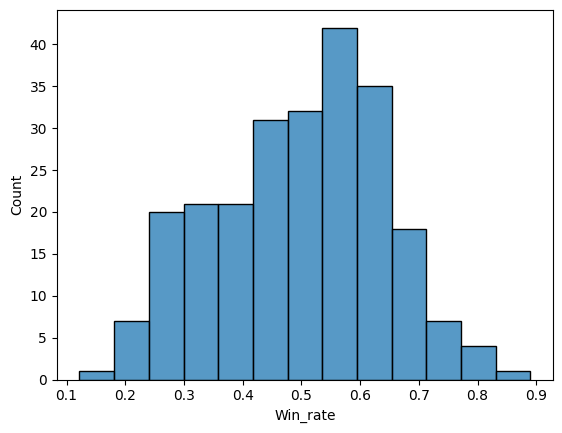

In [ ]:
sns.histplot(data = df, x = 'Win_rate')

In [ ]:
## create a regression with all the numerical variables
X = sm.add_constant(df[['Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
                        'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr',
                        '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
                        'eFG%', 'TOV%', 'DRB%', 'FT/FGA','Game_played'
                        ]])
y = df[['Win_rate']]
model1 = sm.OLS(y, X).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Win_rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6773.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          6.84e-292
Time:                        05:44:44   Log-Likelihood:                 884.10
No. Observations:                 240   AIC:                            -1730.
Df Residuals:                     221   BIC:                            -1664.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4900      0.094      5.218      0.000       0.305       0.675
Age            -0.0006      0.000     -1.918      0.056      -0.001    1.71e-05
W               0.0064   7.38e-05     86.754      0.000       0.006       0.007
L              -0.0063   7.36e-05    -85.052      0.000      -0.006      -0.006
PW             -0.0035      0.000    -12.725      0.000      -0.004      -0.003
PL              0.0036      0.000     13.853      0.000       0.003       0.004
MOV             0.0072      0.076      0.095      0.924      -0.142       0.157
SOS             0.0034      0.076      0.044      0.965      -0.146       0.153
SRS             0.0009      0.076      0.011      0.991      -0.149       0.151
ORtg            0.0021      0.002      1.209      0.228      -0.001       0.006
DRtg           -0.0032      0.002     -2.010      0.046      -0.006   -6.24e-05
NRtg            0.0053      0.003      2.058      0.041       0.000       0.010
Pace           -0.0002      0.000     -0.824      0.411      -0.001       0.000
FTr             0.0656      0.219      0.299      0.765      -0.366       0.498
3PAr            0.0128      0.014      0.934      0.351      -0.014       0.040
TS%             0.3310      0.958      0.345      0.730      -1.557       2.219
eFG%           -0.0550      0.435     -0.126      0.900      -0.913       0.803
TOV%           -0.0010      0.002     -0.663      0.508      -0.004       0.002
ORB%            0.0005      0.001      0.445      0.657      -0.002       0.003
FT/FGA         -0.0446      0.219     -0.204      0.839      -0.475       0.386
eFG%           -0.0550      0.435     -0.126      0.900      -0.913       0.803
TOV%           -0.0010      0.002     -0.663      0.508      -0.004       0.002
DRB%            0.0003      0.000      1.089      0.277      -0.000       0.001
FT/FGA         -0.0446      0.219     -0.204      0.839      -0.475       0.386
Game_played     0.0001   5.01e-05      2.844      0.005    4.38e-05       0.000
==============================================================================
Omnibus:                       18.890   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.680
Skew:                          -0.219   Prob(JB):                     1.34e-12
Kurtosis:                       5.297   Cond. No.                     1.03e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
## Picking variables that are significant in our regression model
## Meanwhile, we are aware of the potential problems of multicollinearity and too obvious correlationship between the Xs and Y
## for example, number of wins (X), playoff(X) and win rate (Y)

In [ ]:
## Removing high VIF variables one by one
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)

       Variable           VIF
0         const  5.271528e+04
1           Age  1.770634e+00
2             W           inf
3             L           inf
4            PW           inf
5            PL           inf
6           MOV  7.355301e+05
7           SOS  3.105499e+03
8           SRS  6.876634e+05
9          ORtg           inf
10         DRtg           inf
11         NRtg           inf
12         Pace  1.619248e+00
13          FTr  1.823170e+02
14         3PAr  3.882183e+00
15          TS%  2.211510e+03
16         eFG%           inf
17         TOV%           inf
18         ORB%  4.364442e+01
19       FT/FGA           inf
20         eFG%           inf
21         TOV%           inf
22         DRB%  1.500195e+00
23       FT/FGA           inf
24  Game_played           inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
X = sm.add_constant(df[['Age', 'SOS',
                        'SRS', 'DRtg', 'Pace', 'FTr',
                        '3PAr', 'TOV%', 'ORB%',
                        'DRB%','Game_played'
                        ]])
y = df[['Win_rate']]
model1 = sm.OLS(y, X).fit()

In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)

       Variable           VIF
0         const  10787.322746
1           Age      1.691942
2           SOS      1.405881
3           SRS      3.700292
4          DRtg      3.153578
5          Pace      1.457489
6           FTr      1.150343
7          3PAr      1.923009
8          TOV%      1.487397
9          ORB%      1.449157
10         DRB%      1.323869
11  Game_played      1.261475


In [ ]:
## We ended up using two variables 'Age','SRS' ,'SRS'
## With an alpha of 0.1
final_X = sm.add_constant(df[['Age','SOS', 'SRS']])
y = df[['Win_rate']]
model2 = sm.OLS(y, final_X).fit()

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Win_rate   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     955.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          1.16e-131
Time:                        05:44:56   Log-Likelihood:                 435.45
No. Observations:                 240   AIC:                            -862.9
Df Residuals:                     236   BIC:                            -849.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3920      0.047      8.306      0.0

In [ ]:
## check multicollinearity with SOS and SRS
df.corr()['SOS'].loc['SRS']

<ipython-input-30-4e94e6f7b537>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SOS'].loc['SRS']


-0.5000176892546473

In [ ]:
## once we finalized the variables, we can start working on the cv
model = LinearRegression()
final_x = df[['Age','SOS', 'SRS']]
y = df['Win_rate']

In [ ]:
## validation-set approach
x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size = 0.25, random_state = 42)
LR_1 = model.fit(x_train,y_train)

In [ ]:
y_pred_1 = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
rmse = np.sqrt(mse)

In [ ]:
print(r2, rmse)

0.9237438043894872 0.034789842889190785


In [ ]:
## K-fold cross validation (k=5)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, final_x, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive values
mse_scores = -cv_scores

# Calculate the RMSE scores by taking the square root of the MSE scores
rmse_scores = np.sqrt(mse_scores)

# Print the average RMSE score
print(f"Average RMSE: {np.mean(rmse_scores):.5f}")

# Calculate cross-validation score for the multiple Regression regression model
cv_scores = cross_val_score(model, final_x, y, cv=5)

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {np.mean(cv_scores):.3f}")


Average RMSE: 0.03989
Average Cross-Validation Score: 0.917


In [ ]:
## Leave-One-Out Cross-Validation
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model, final_x, y, cv=loo)

In [ ]:
# Perform Leave-One-Out Cross-Validation
scores = cross_val_score(model, final_x, y, cv=loo, scoring='neg_mean_squared_error')

# Compute the mean squared error (MSE)
mean_mse = -scores.mean()

print(f"Mean Squared Error (MSE) using LOOCV: {round(mean_mse,4)}")

Mean Squared Error (MSE) using LOOCV: 0.0016


In [ ]:
scores = cross_val_score(model, final_x, y, cv=loo)

# Compute the average validation score
average_score = scores.mean()

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {average_score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

Average Cross-Validation Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

In [ ]:
final_x.isnull().sum()

Age    0
SOS    0
SRS    0
dtype: int64

In [ ]:
y.isnull().sum()

0